In [17]:
import pandas as pd
import math
import numpy as np

In [10]:
import cv2

def is_blurry(image_path, threshold=100):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Laplacian operator
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()

    # If the variance is less than the threshold, it's blurry
    return variance < threshold

# Example usage
image_path = 'faces-labels/114/Wedding-2029_7.png'
if is_blurry(image_path):
    print(f"The image {image_path} is blurry.")
else:
    print(f"The image {image_path} is not blurry.")


The image faces-labels/114/Wedding-2029_7.png is not blurry.


libpng warning: iCCP: known incorrect sRGB profile


In [3]:
df = pd.read_csv('FaceDetection.csv')

In [23]:
1 - (df['LabeledFaces'] - df['DetectedFaces']).apply(lambda x: max(x, 0)).sum() / df['LabeledFaces'].sum()

0.7692307692307692

In [1]:
import utilities
import face_recognition
import dlib

for file_path, faces in utilities.load_json('faces_num_labels_1.json').items():
    image = face_recognition.load_image_file(file_path)

    face_locations = face_recognition.face_locations(image, model='hog')
    face_encodings = face_recognition.face_encodings(image, face_locations)

    print(faces, len(face_locations))

SyntaxError: invalid syntax (781246075.py, line 5)

In [4]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

/Users/shirabroner/DataScience/venv/Default/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shirabroner/DataScience/venv/Default/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


tensor(0.9990) person
tensor(0.9986) person
tensor(0.9620) person
tensor(0.9126) person
tensor(0.8657) person


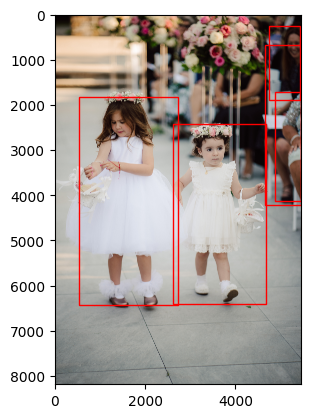

In [27]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models

# Load a pre-trained model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load an image
image = Image.open('/Users/shirabroner/Downloads/all-wedding-photos/Wedding-1313.jpg')
transform = T.Compose([T.ToTensor()]) 
image = transform(image)

# Perform inference
with torch.no_grad():
    prediction = model([image])

# Display predictions
plt.imshow(image.permute(1, 2, 0))
for element in range(len(prediction[0]['boxes'])):
    score = prediction[0]['scores'][element]
    if score > 0.8:  # Choose a threshold
        box = prediction[0]['boxes'][element].cpu().numpy()
        box_label = COCO_INSTANCE_CATEGORY_NAMES[prediction[0]['labels'][element].item()]
        print(score, box_label)
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='red'))

plt.show()


252802.09848344326 True
150103.0552201867 True
8819.35628771782 False


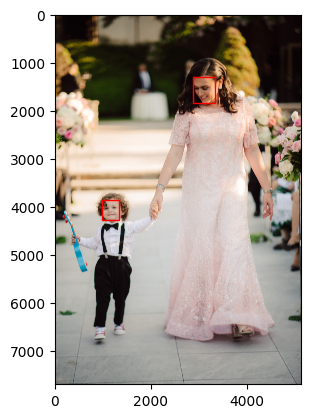

In [52]:
import torch
from facenet_pytorch import MTCNN, extract_face
import matplotlib.pyplot as plt
from PIL import Image
import os

# Initialize MTCNN
mtcnn = MTCNN(keep_all=True, device=torch.device('cpu' if torch.backends.mps.is_available() else 'cpu'))

# Load an image
file_path = '/Users/shirabroner/Downloads/all-wedding-photos/Wedding-1316.jpg'
image = Image.open(file_path)

# Detect faces
boxes, _ = mtcnn.detect(image)
i = 0
# Draw boxes on the image
fig, ax = plt.subplots()
ax.imshow(image)
file_name = os.path.basename(file_path).split(".")[0]
i = 0
if boxes is not None:
    for box in boxes:
        x,y, w, h = box[0], box[1], box[2]-box[0], box[3]-box[1]
        print(h * w, (h * w) > 10000)
        if h * w < 10000:
            continue
        rect = plt.Rectangle((x,y), w, h, fill=False, color='red')
        extract_face(image, box, save_path=os.path.join('faces', f'{file_name}_{i}.png'.format(i)))
        i += 1
        ax.add_patch(rect)

plt.show()

In [53]:
from facenet_pytorch import InceptionResnetV1

In [54]:
resnet = InceptionResnetV1(pretrained='vggface2').eval()

100.0%


In [68]:
from PIL import Image
from torchvision import transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts the image to a tensor
    #transforms.Resize((256, 256))
    # Add other transformations if necessary
    # e.g., transforms.Resize((256, 256)),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [70]:
resnet(transform(Image.open('faces/Wedding-2360_0.png')).unsqueeze(0))

tensor([[-1.9689e-02, -3.8878e-02, -5.6399e-02, -2.8482e-02, -1.0043e-02,
          5.3109e-02,  2.1314e-02, -2.3761e-02, -2.0409e-02,  6.4599e-02,
          4.6119e-02,  1.2343e-03,  8.6723e-03, -4.7310e-02, -1.1605e-02,
         -5.6945e-02,  4.0642e-02, -4.2412e-03, -4.0420e-02, -2.1318e-02,
         -3.0595e-02,  1.4201e-02,  5.4351e-02,  4.3588e-02, -3.9828e-02,
         -2.3171e-02, -1.1546e-02, -2.8961e-02, -6.9545e-02, -4.4491e-02,
         -9.2385e-03,  4.5976e-02, -6.8284e-02,  2.4356e-02, -5.7292e-02,
          6.2616e-02,  4.0072e-02, -1.9625e-02, -3.4933e-02, -1.0145e-02,
          6.0883e-03,  1.4753e-02,  6.0276e-03,  2.6004e-03,  3.7855e-02,
          7.7528e-03,  1.0846e-01,  4.1609e-02, -1.1981e-02, -4.1609e-02,
          3.3615e-02,  3.7597e-02,  7.5910e-02,  8.1412e-02,  5.7791e-02,
          2.6207e-02, -3.2473e-02,  7.0403e-03,  1.6674e-02,  1.0161e-03,
          1.0787e-02,  5.5861e-04, -8.7476e-03, -4.5963e-02,  6.6643e-02,
         -2.9954e-02,  2.5722e-02,  6.